In [13]:
# المناقلات
transactions = [['Bread', 'Milk'],
['Bread', 'Diaper', 'Beer', 'Eggs'],
['Milk', 'Diaper', 'Beer', 'Coke' ],
['Bread', 'Milk', 'Diaper', 'Beer'],
['Bread', 'Milk', 'Diaper', 'Coke']]

# مكتبة ترميز المناقلات
from mlxtend.preprocessing import TransactionEncoder

# إنشاء غرض من الصف 
te = TransactionEncoder()
# ملائمة المرمز مع البيانات
te_model = te.fit(transactions)
# تحويل المناقلات 
rows=te_model.transform(transactions)
# استيراد مكتبة إطار البيانات
import pandas as pd
# بناء إطار بيانات المناقلات 
df = pd.DataFrame(rows, columns=te_model.columns_)
print(df)

    Beer  Bread   Coke  Diaper   Eggs   Milk
0  False   True  False   False  False   True
1   True   True  False    True   True  False
2   True  False   True    True  False   True
3   True   True  False    True  False   True
4  False   True   True    True  False   True


In [14]:
# مكتبة خوارزمية إيجاد العناصر المتواترة
from mlxtend.frequent_patterns import apriori
# توليد المجموعات المتواترة مع تحديد الحد الأدنى للدعم
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
# حساب أطوال مجموعات العناصر
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

    support               itemsets  length
0       0.6                 (Beer)       1
1       0.8                (Bread)       1
2       0.4                 (Coke)       1
3       0.8               (Diaper)       1
4       0.8                 (Milk)       1
5       0.4          (Beer, Bread)       2
6       0.6         (Beer, Diaper)       2
7       0.4           (Beer, Milk)       2
8       0.6        (Bread, Diaper)       2
9       0.6          (Bread, Milk)       2
10      0.4         (Diaper, Coke)       2
11      0.4           (Milk, Coke)       2
12      0.6         (Milk, Diaper)       2
13      0.4  (Beer, Diaper, Bread)       3
14      0.4   (Beer, Milk, Diaper)       3
15      0.4  (Bread, Milk, Diaper)       3
16      0.4   (Milk, Diaper, Coke)       3


In [15]:
# مكتبة خوارزمية إيجاد قواعد الترابط 
from mlxtend.frequent_patterns import association_rules
# توليد القواعد مع تحديد الحد الأدنى للثقة
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)
# الترتيب التنازلي وفق معامل الثقة
rules = rules.sort_values(['confidence'], ascending =[False])
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
13    (Beer, Bread)         (Diaper)                 0.4                 0.8   
8            (Coke)         (Diaper)                 0.4                 0.8   
25   (Diaper, Coke)           (Milk)                 0.4                 0.8   
24     (Milk, Coke)         (Diaper)                 0.4                 0.8   
16     (Beer, Milk)         (Diaper)                 0.4                 0.8   
1            (Beer)         (Diaper)                 0.6                 0.8   
9            (Coke)           (Milk)                 0.4                 0.8   
26           (Coke)   (Milk, Diaper)                 0.4                 0.6   
7            (Milk)          (Bread)                 0.8                 0.8   
10           (Milk)         (Diaper)                 0.8                 0.8   
11         (Diaper)           (Milk)                 0.8                 0.8   
2          (Diaper)           (Beer)    

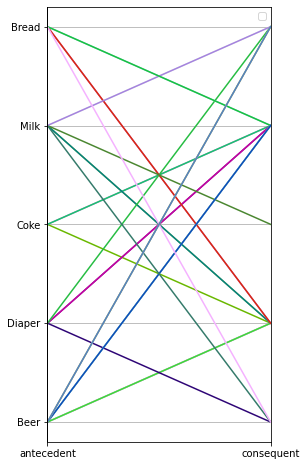

In [16]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
# دالة تحويل القواعد إلى إحداثيات
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]
# توليد الإحداثيات المتوازية
coords = rules_to_coordinates(rules)
# توليد رسم الإحداثيات المتوازية
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

In [17]:
# تحميل بيانات المتجر
df = pd.read_csv('Groceries.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# حذف القيم الفارغة
# وإنشاء مصفوفة
transactions =  df.T.apply(lambda x: x.dropna().tolist()).tolist()
print(transactions[1:10])

[['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['pot plants'], ['whole milk', 'cereals']]


In [19]:
# إنشاء غرض من الصف 
te = TransactionEncoder()
# ملائمة المرمز مع البيانات
te_model = te.fit(transactions)
# تحويل المناقلات 
rows=te_model.transform(transactions)
# بناء إطار بيانات المناقلات 
df = pd.DataFrame(rows, columns=te_model.columns_)
print(df.shape)

(9835, 169)


In [20]:
# توليد المجموعات المتواترة مع تحديد الحد الأدنى للدعم
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
# حساب أطوال مجموعات العناصر
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

       support                                           itemsets  length
0     0.008033                            (Instant food products)       1
1     0.033452                                         (UHT-milk)       1
2     0.017692                                    (baking powder)       1
3     0.052466                                             (beef)       1
4     0.033249                                          (berries)       1
...        ...                                                ...     ...
996   0.005186  (other vegetables, root vegetables, whole milk...       4
997   0.007829  (other vegetables, root vegetables, yogurt, wh...       4
998   0.007626  (other vegetables, tropical fruit, yogurt, who...       4
999   0.005592  (other vegetables, yogurt, whole milk, whipped...       4
1000  0.005694  (tropical fruit, root vegetables, whole milk, ...       4

[1001 rows x 3 columns]


In [21]:
# توليد القواعد مع تحديد الحد الأدنى للثقة
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.55)
# الترتيب التنازلي وفق معامل الثقة
rules = rules.sort_values(['confidence'], ascending =[False])
print(rules)

                                          antecedents         consequents  \
53          (tropical fruit, root vegetables, yogurt)        (whole milk)   
44     (other vegetables, root vegetables, pip fruit)        (whole milk)   
10                       (butter, whipped/sour cream)        (whole milk)   
35                    (pip fruit, whipped/sour cream)        (whole milk)   
11                                   (butter, yogurt)        (whole milk)   
8                           (butter, root vegetables)        (whole milk)   
18                             (tropical fruit, curd)        (whole milk)   
42        (root vegetables, citrus fruit, whole milk)  (other vegetables)   
46              (other vegetables, yogurt, pip fruit)        (whole milk)   
23                         (domestic eggs, pip fruit)        (whole milk)   
9                            (tropical fruit, butter)        (whole milk)   
21                         (margarine, domestic eggs)        (whole milk)   

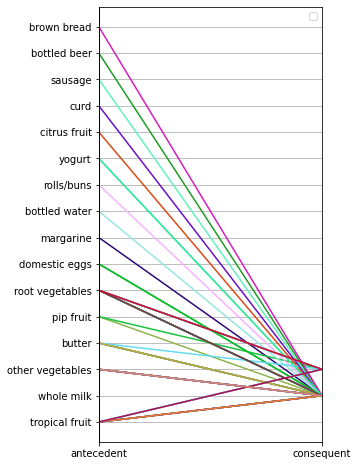

In [22]:
from pandas.plotting import parallel_coordinates
# دالة تحويل القواعد إلى إحداثيات
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]
# توليد الإحداثيات المتوازية
coords = rules_to_coordinates(rules)
# توليد رسم الإحداثيات المتوازية
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()